# Modelado Matemático

**Carlos Andrés Bautista Torres**

código: 2208057

<img src="imagenes\fig1.png" width="150%" align="center" >


## EL JUEGO DE LA VIDA

> **En su versión original, las reglasdel juego son:**
* Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
* Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").


In [133]:
import numpy as np                #librería para declarar matrices y otras funciones necesarias para el juego
import matplotlib.pyplot as plt   #librería para graficar
import imageio
import os # para borrar archivos.
from IPython.display import Image, display
#from matplotlib.animation import FuncAnimation, PillowWriter  #librería para hacer gif directamente.
#import matplotlib.animation as animation 

In [2]:
def dim_matrix(M): # en este modelo usaremos solo matrices cuadradas.
    a = np.random.randint(low=0, high=2, size=M**2)
    a = a.reshape(M, M)
    return a

In [60]:
# Esta función limpia los bordes de la matríz, en este punto, dim = dim-2.
def clean_borders(a:np.ndarray, dim): 
    a[0,:] = 0
    a[dim-1,:] = 0
    a[:,0] = 0
    a[:,dim-1] = 0
    return a
    

Para hacer el conteo de los vecinos vivos y muertos para cada casilla, se tiene en cuenta la siguiente configuración.

<img src="imagenes\vecinos.png" width="50%" align="center" >

En la función que definiré en la siguiente linea, se comienza centrando en v8 y a partir de allí se va rodando por todo el borde hasta llegar a v1.

In [59]:
# Cuenta los vecinos que tiene cada celda.
# es importante especificar el tipo de variable que es "a". De lo contrario no entenderá.
def counter(a:np.ndarray): 
    v8 = np.roll(a , shift = 1 , axis = 1)
    v7 = np.roll(v8, shift =-1 , axis = 0)
    v6 = np.roll(v7, shift =-1 , axis = 1)
    v5 = np.roll(v6, shift =-1 , axis = 1)
    v4 = np.roll(v5, shift = 1 , axis = 0)
    v3 = np.roll(v4, shift = 1 , axis = 0)
    v2 = np.roll(v3, shift = 1 , axis = 1)
    v1 = np.roll(v2, shift = 1 , axis = 1)
    return v1+v2+v3+v4+v5+v6+v7+v8


In [5]:
# se tuvieron en cuenta las condiciones originales del juego.
def new_matrix(a:np.ndarray, b:np.ndarray):
    i,j = 0,0
    while i <= len(a)-1:
        while j <= len(a)-1:
            if b[i,j] == 3 and a[i,j] == 0:
                a[i,j] = 1
            if (b[i,j] == 3 or b[i,j] == 2) and a[i,j] == 1:
                a[i,j] = 1
            else:
                a[i,j] = 0
            j = j + 1
        j = 0
        i = i + 1
    return a

In [55]:
def main_aleatory(dim, t):
    dim = dim + 2   # esto compensa la reducción en la dimensión que hace clean_borders
    a2 = dim_matrix(dim) 
    a = clean_borders(a2, dim)
    plt.imshow(a)
    plt.title('tiempo_0')
    plt.savefig('imag_0.jpg')
    images = []
    for i in list(range(t+1)):
        b = counter(a)
        c2 = new_matrix(a,b)
        c = clean_borders(c2, dim)
        plt.title('tiempo_{}'.format(i))
        plt.imshow(c)
        plt.savefig('imag_{}.jpg'.format(i)) # el .format me guarda cada imagen con un _# diferente
        images.append(imageio.imread("imag_{}.jpg".format(i))) # Aquí las lee para poner al gif 
        imageio.mimsave('movie.gif', images, fps= 3)  # Aquí las añade al gif
        os.remove("imag_{}.jpg".format(i)) # Aquí se borra la imagen para que no ocupe memoria
        a = c
    

#  Resultado!


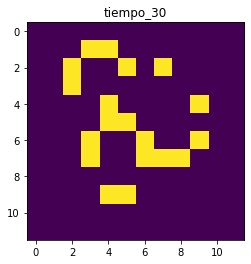

In [57]:
main_aleatory(10, 30)

 **------------------------------------------------------------------------------------------------------------------------------------**
## GIF
![SegmentLocal](movie.gif "segment")

 **------------------------------------------------------------------------------------------------------------------------------------**
## Figuras periodicas
Una de las características que posee este juego, es que se pueden generar soluciones estacionarias, bajo condiciones iniciales específicas. En el siguiente caso la solución es oscilatoria y estable  

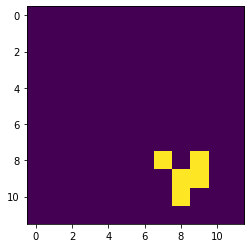

In [179]:
M =np.array([[0,0,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,1,0,0,0,0,0,0,0,0],
             [0,1,1,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,0]])
dim = 12
a = clean_borders(M, 12)
plt.imshow(a)
plt.savefig('imag_0.jpg')
t = 25
images = []
for i in list(range(t+1)):
    b = counter(a)
    c2 = new_matrix(a,b)
    c = clean_borders(c2, dim)
    plt.imshow(c)
    plt.savefig('imag_{}.jpg'.format(i)) # el .format me guarda cada imagen con un _# diferente
    images.append(imageio.imread("imag_{}.jpg".format(i))) # Aquí las lee para poner al gif 
    imageio.mimsave('mini_prueba3.gif', images, fps= 3)  # Aquí las añade al gif
    os.remove("imag_{}.jpg".format(i)) # Aquí se borra la imagen para que no ocupe memoria
    a = c

 **------------------------------------------------------------------------------------------------------------------------------------**
## Gif que poseen cierta periodicidad!!
![SegmentLocal](mini_prueba2.gif "segment")
![SegmentLocal](mini_prueba.gif "segment") 
![SegmentLocal](mini_prueba3.gif "segment")

 **------------------------------------------------------------------------------------------------------------------------------------**
 # Análisis estadístico
 
 Podemos realizar el conteo de células vivas en cada momento y obtener una gráfica de población en el tiempo.

In [157]:
def population(a:np.ndarray):
    suma = a.sum()
    return suma
    

In [158]:
def main_aleatory_statistic(dim, t):
    p = []
    dim = dim + 2  # esto compensa la reducción en la dimensión que hace clean_borders
    a2 = dim_matrix(dim)
    a = clean_borders(a2, dim)
    p.append(population(a))
    plt.imshow(a)
    plt.title('tiempo_0')
    plt.savefig('imag_0.jpg')
    images = []
    for i in list(range(t+1)):
        b = counter(a)
        c2 = new_matrix(a,b)
        c = clean_borders(c2, dim)
        p.append(population(c))   #guardamos los datos en el vector p
        plt.title('tiempo_{}'.format(i))
        plt.imshow(c)
        plt.savefig('imag_{}.jpg'.format(i)) 
        images.append(imageio.imread("imag_{}.jpg".format(i))) 
        imageio.mimsave('movie_statistics.gif', images, fps= 3) 
        os.remove("imag_{}.jpg".format(i)) 
        a = c
    return p

In [168]:
def plott(t):
    x = x =list(range(t+2))
    plt.title("población en función del tiempo")
    plt.xlabel('días')
    plt.ylabel('personas vivas')
    plt.plot(x,y)

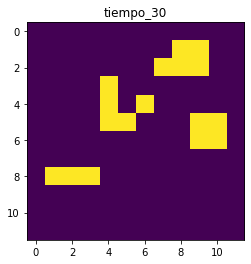

In [181]:
y = main_aleatory_statistic(10,30)
z = main_aleatory_statistic(10,30)
w = main_aleatory_statistic(10,30)


![SegmentLocal](movie_statistics.gif "segment")

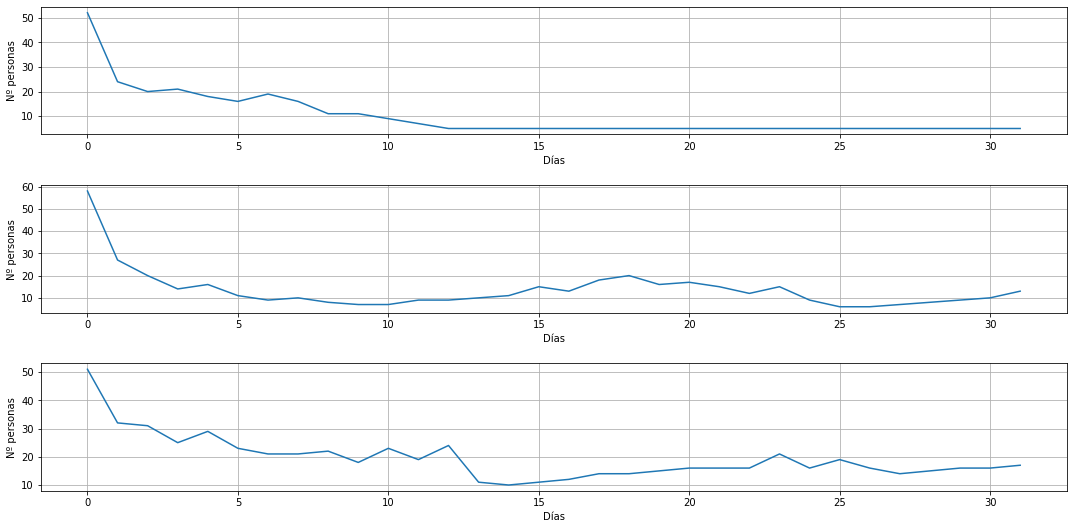

In [191]:
t = 30
x = x =list(range(t+2))

plt.subplot(3, 1, 1)
plt.plot(x,y)
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(x,z)
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x,w)
plt.ylabel('Nº personas')
plt.xlabel("Días")
plt.grid()

plt.subplots_adjust(left=None, bottom=-0.8, right=2.5, top=None, wspace=None, hspace=0.4)
plt.show()

Lo que observé tras haber realizado varias corridas con matrices iniciales aleatorias, fue una considerable disminución de células vivas en el primer paso de tiempo. Esto se debe a que es más probable que mueran células a que nazcan, debido a las mismas normas del juego. Después de la disminución de las células vivas, lo que ocurre es prácticamente incierto, aunque usualmente llega un punto donde la población se estabiliza y en otros casos donde incluso se estabilizan en "0 personas vivas". 